In [1]:
import pandas as pd

from os import path
import sys
sys.path.append(path.abspath('/mnt/B6C8BAECC8BAAA4F/André/UC/Tese/MScThesis/Graphy'))

import graphy
from graphy.db import opentsdb
from graphy.utils import zipkin

In [2]:
# service_names = zipkin.get_services()

service_names = ['api_com', 
                 'cinder-api-cascaded',
                 'neutron-server-cascading'] 

In [3]:
start_timestamp = 1530057600     # 27.06.2018 00:00:00
end_timestamp = 1530316800       # 30.06.2018 00:00:00

metric_pre_name = 'huawei'

metric_single_type = ['graph_variance', 'graph_gain_variance', 'graph_loss_variance']

metric_double_types = ['call_count', 'call_count_in', 'call_count_out', 
                         'response_time_avg', 
                         'degree', 'degree_in', 'degree_out']

metric_status_code = 'status_code'

metric_triple_types_1 = ['1XX', '2XX', '3XX', '4XX', '5XX']

metric_names = list()

# Single param metric
for metric_type in metric_single_type:
    metric_names.append('{}.{}'.format(metric_pre_name, metric_type))

# Double param metric
for service_name in service_names:
    for metric_type in metric_double_types:
        metric_names.append('{}.{}.{}'.format(metric_pre_name, metric_type, service_name))
        

# Triple param metric
for service_name in service_names:
    for metric_type in metric_triple_types_1:
        metric_names.append('{}.{}.{}.{}'.format(metric_pre_name, metric_status_code, service_name, metric_type))
                
metric_names

['huawei.graph_variance',
 'huawei.graph_gain_variance',
 'huawei.graph_loss_variance',
 'huawei.call_count.api_com',
 'huawei.call_count_in.api_com',
 'huawei.call_count_out.api_com',
 'huawei.response_time_avg.api_com',
 'huawei.degree.api_com',
 'huawei.degree_in.api_com',
 'huawei.degree_out.api_com',
 'huawei.call_count.cinder-api-cascaded',
 'huawei.call_count_in.cinder-api-cascaded',
 'huawei.call_count_out.cinder-api-cascaded',
 'huawei.response_time_avg.cinder-api-cascaded',
 'huawei.degree.cinder-api-cascaded',
 'huawei.degree_in.cinder-api-cascaded',
 'huawei.degree_out.cinder-api-cascaded',
 'huawei.call_count.neutron-server-cascading',
 'huawei.call_count_in.neutron-server-cascading',
 'huawei.call_count_out.neutron-server-cascading',
 'huawei.response_time_avg.neutron-server-cascading',
 'huawei.degree.neutron-server-cascading',
 'huawei.degree_in.neutron-server-cascading',
 'huawei.degree_out.neutron-server-cascading',
 'huawei.status_code.api_com.1XX',
 'huawei.status_c

In [4]:
import pandas as pd

metrics_df = pd.DataFrame(columns=['metric_name', 'timestamp', 'datetime', 'value'])

metric_series = []

for metric_name in metric_names:
    metrics = opentsdb.get_metrics(metric_name, start_timestamp, end_timestamp)
    if metrics is None:
        continue
    for metric in metrics:
        metric_series.append(pd.Series([metric_name, metric, 0, metrics[metric]], index=metrics_df.columns))

metrics_df = metrics_df.append(metric_series, ignore_index=True)

metrics_df['datetime'] = pd.to_datetime(metrics_df['timestamp'], unit='s')
    
metrics_df

,metric_name,timestamp,datetime,value
0,huawei.graph_variance,1530138165,2018-06-27 22:22:45,0.000000
1,huawei.graph_variance,1530138195,2018-06-27 22:23:15,-1.000000
2,huawei.graph_variance,1530138210,2018-06-27 22:23:30,-1.000000
3,huawei.graph_variance,1530140670,2018-06-27 23:04:30,0.000000
4,huawei.graph_variance,1530140685,2018-06-27 23:04:45,0.000000
5,huawei.graph_variance,1530140700,2018-06-27 23:05:00,0.000000
6,huawei.graph_variance,1530140715,2018-06-27 23:05:15,0.000000
7,huawei.graph_variance,1530140730,2018-06-27 23:05:30,0.000000
8,huawei.graph_variance,1530140745,2018-06-27 23:05:45,0.000000
9,huawei.graph_variance,1530141300,2018-06-27 23:15:00,0.000000


In [5]:
#metrics_df.to_csv ('huawei_tracing_metrics.csv', index = None, header=True)

In [6]:
metric_names

['huawei.graph_variance',
 'huawei.graph_gain_variance',
 'huawei.graph_loss_variance',
 'huawei.call_count.api_com',
 'huawei.call_count_in.api_com',
 'huawei.call_count_out.api_com',
 'huawei.response_time_avg.api_com',
 'huawei.degree.api_com',
 'huawei.degree_in.api_com',
 'huawei.degree_out.api_com',
 'huawei.call_count.cinder-api-cascaded',
 'huawei.call_count_in.cinder-api-cascaded',
 'huawei.call_count_out.cinder-api-cascaded',
 'huawei.response_time_avg.cinder-api-cascaded',
 'huawei.degree.cinder-api-cascaded',
 'huawei.degree_in.cinder-api-cascaded',
 'huawei.degree_out.cinder-api-cascaded',
 'huawei.call_count.neutron-server-cascading',
 'huawei.call_count_in.neutron-server-cascading',
 'huawei.call_count_out.neutron-server-cascading',
 'huawei.response_time_avg.neutron-server-cascading',
 'huawei.degree.neutron-server-cascading',
 'huawei.degree_in.neutron-server-cascading',
 'huawei.degree_out.neutron-server-cascading',
 'huawei.status_code.api_com.1XX',
 'huawei.status_c

In [7]:
import matplotlib.pyplot as plt

def plot_df(df, groupby, x_column, y_column):
    fig, ax = plt.subplots()

    for key, grp in df.groupby([groupby]):
        ax = grp.plot(ax=ax, kind='line', x=x_column, y=y_column, label=key)

    plt.legend(loc='best')
    plt.show()

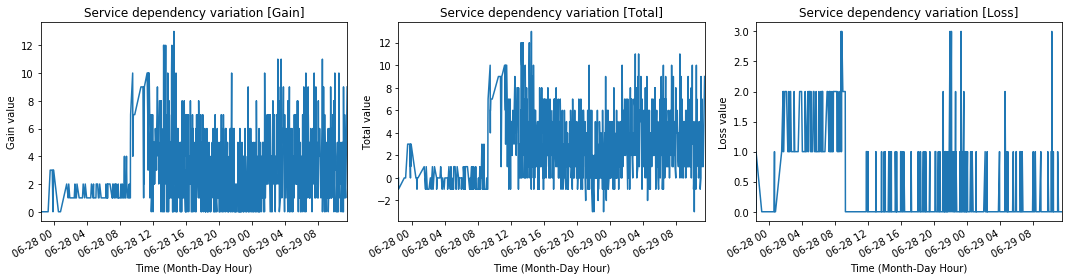

In [8]:
values = ['huawei.graph_variance',
          'huawei.graph_gain_variance',
          'huawei.graph_loss_variance']

huawei_graph_variance_df = metrics_df.loc[metrics_df['metric_name'] == values[0]]
huawei_graph_variance_gain_df = metrics_df.loc[metrics_df['metric_name'] == values[1]]
huawei_graph_variance_loss_df = metrics_df.loc[metrics_df['metric_name'] == values[2]]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax = huawei_graph_variance_gain_df.plot(ax=axes[0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service dependency variation [Gain]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Gain value")
ax.get_legend().remove()

ax = huawei_graph_variance_df.plot(ax=axes[1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service dependency variation [Total]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Total value")
ax.get_legend().remove()

ax = huawei_graph_variance_loss_df.plot(ax=axes[2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service dependency variation [Loss]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Loss value")
ax.get_legend().remove()

fig.tight_layout()
plt.show()

fig.savefig('service_dependency_variation.pdf')

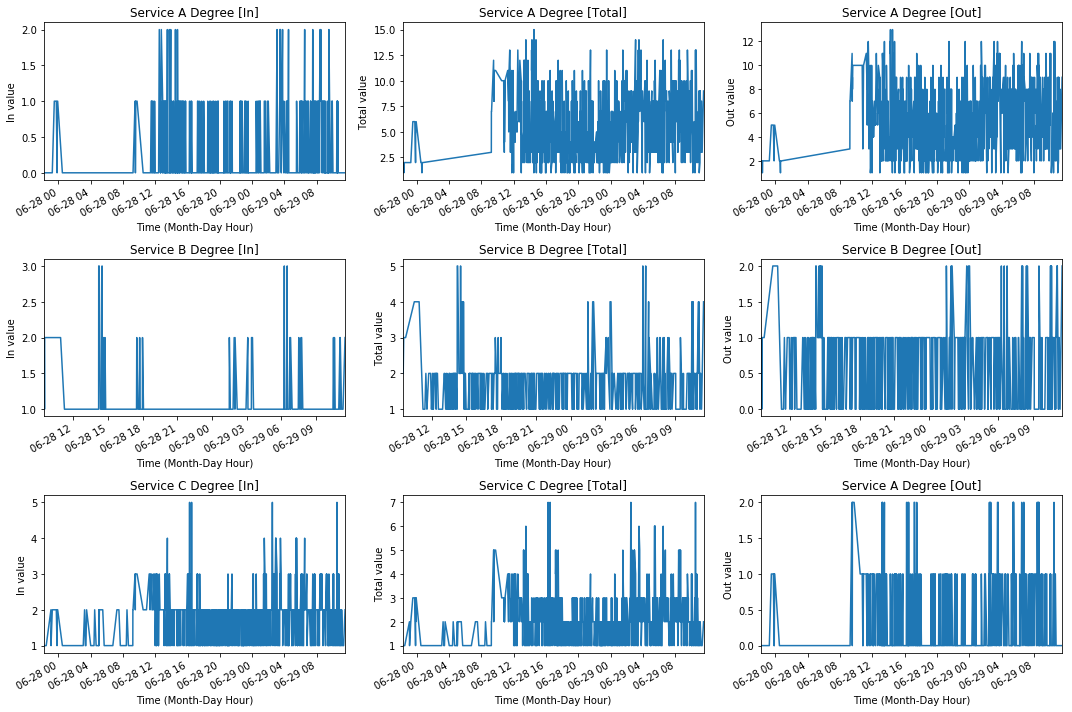

In [9]:
values = ['huawei.degree_in.api_com', 
          'huawei.degree.api_com',
          'huawei.degree_out.api_com',
          'huawei.degree_in.cinder-api-cascaded',
          'huawei.degree.cinder-api-cascaded',
          'huawei.degree_out.cinder-api-cascaded',
          'huawei.degree_in.neutron-server-cascading',
          'huawei.degree.neutron-server-cascading',
          'huawei.degree_out.neutron-server-cascading']

huawei_service_degree_df_1 = metrics_df.loc[metrics_df['metric_name'] == values[0]]
huawei_service_degree_df_2 = metrics_df.loc[metrics_df['metric_name'] == values[1]]
huawei_service_degree_df_3 = metrics_df.loc[metrics_df['metric_name'] == values[2]]
huawei_service_degree_df_4 = metrics_df.loc[metrics_df['metric_name'] == values[3]]
huawei_service_degree_df_5 = metrics_df.loc[metrics_df['metric_name'] == values[4]]
huawei_service_degree_df_6 = metrics_df.loc[metrics_df['metric_name'] == values[5]]
huawei_service_degree_df_7 = metrics_df.loc[metrics_df['metric_name'] == values[6]]
huawei_service_degree_df_8 = metrics_df.loc[metrics_df['metric_name'] == values[7]]
huawei_service_degree_df_9 = metrics_df.loc[metrics_df['metric_name'] == values[8]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

ax = huawei_service_degree_df_1.plot(ax=axes[0, 0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Degree [In]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("In value")
ax.get_legend().remove()

ax = huawei_service_degree_df_2.plot(ax=axes[0, 1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Degree [Total]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Total value")
ax.get_legend().remove()

ax = huawei_service_degree_df_3.plot(ax=axes[0, 2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Degree [Out]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Out value")
ax.get_legend().remove()

ax = huawei_service_degree_df_4.plot(ax=axes[1, 0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service B Degree [In]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("In value")
ax.get_legend().remove()

ax = huawei_service_degree_df_5.plot(ax=axes[1, 1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service B Degree [Total]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Total value")
ax.get_legend().remove()

ax = huawei_service_degree_df_6.plot(ax=axes[1, 2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service B Degree [Out]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Out value")
ax.get_legend().remove()

ax = huawei_service_degree_df_7.plot(ax=axes[2, 0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service C Degree [In]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("In value")
ax.get_legend().remove()

ax = huawei_service_degree_df_8.plot(ax=axes[2, 1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service C Degree [Total]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Total value")
ax.get_legend().remove()

ax = huawei_service_degree_df_9.plot(ax=axes[2, 2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Degree [Out]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Out value")
ax.get_legend().remove()

fig.tight_layout()
plt.show()

fig.savefig('service_degrees.pdf')

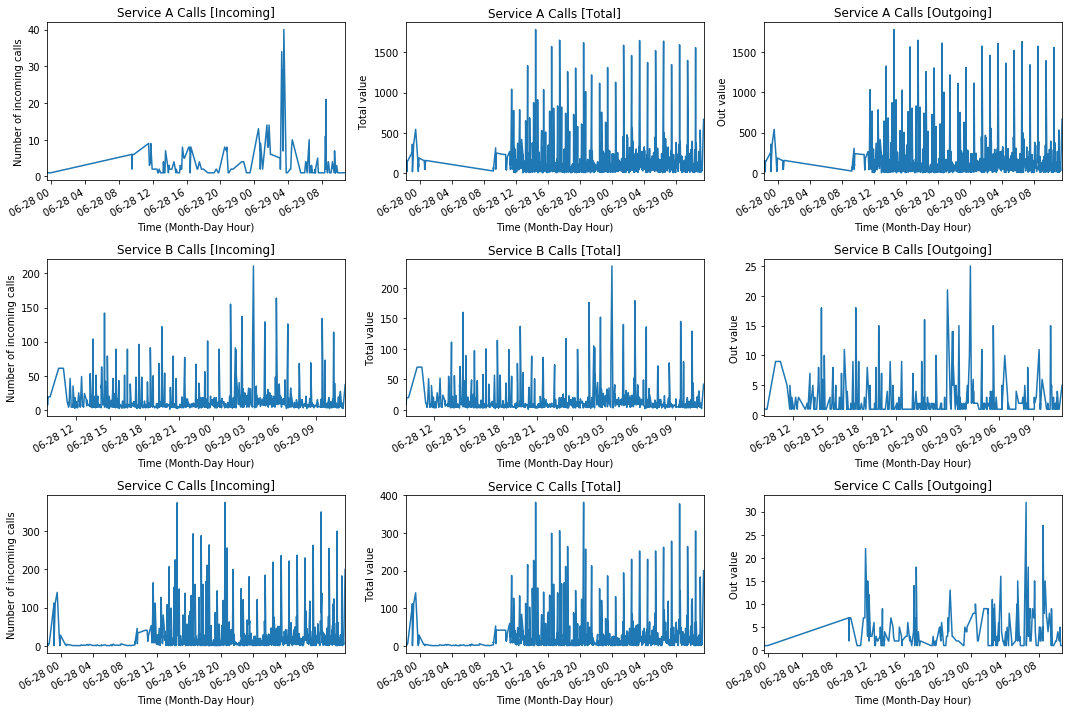

In [10]:
values = ['huawei.call_count_in.api_com', 
          'huawei.call_count.api_com', 
          'huawei.call_count_out.api_com',
          'huawei.call_count_in.cinder-api-cascaded',
          'huawei.call_count.cinder-api-cascaded',
          'huawei.call_count_out.cinder-api-cascaded',
          'huawei.call_count_in.neutron-server-cascading',
          'huawei.call_count.neutron-server-cascading',
          'huawei.call_count_out.neutron-server-cascading']

huawei_service_degree_df_1 = metrics_df.loc[metrics_df['metric_name'] == values[0]]
huawei_service_degree_df_2 = metrics_df.loc[metrics_df['metric_name'] == values[1]]
huawei_service_degree_df_3 = metrics_df.loc[metrics_df['metric_name'] == values[2]]
huawei_service_degree_df_4 = metrics_df.loc[metrics_df['metric_name'] == values[3]]
huawei_service_degree_df_5 = metrics_df.loc[metrics_df['metric_name'] == values[4]]
huawei_service_degree_df_6 = metrics_df.loc[metrics_df['metric_name'] == values[5]]
huawei_service_degree_df_7 = metrics_df.loc[metrics_df['metric_name'] == values[6]]
huawei_service_degree_df_8 = metrics_df.loc[metrics_df['metric_name'] == values[7]]
huawei_service_degree_df_9 = metrics_df.loc[metrics_df['metric_name'] == values[8]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

ax = huawei_service_degree_df_1.plot(ax=axes[0, 0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Calls [Incoming]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Number of incoming calls")
ax.get_legend().remove()

ax = huawei_service_degree_df_2.plot(ax=axes[0, 1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Calls [Total]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Total value")
ax.get_legend().remove()

ax = huawei_service_degree_df_3.plot(ax=axes[0, 2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Calls [Outgoing]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Out value")
ax.get_legend().remove()

ax = huawei_service_degree_df_4.plot(ax=axes[1, 0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service B Calls [Incoming]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Number of incoming calls")
ax.get_legend().remove()

ax = huawei_service_degree_df_5.plot(ax=axes[1, 1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service B Calls [Total]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Total value")
ax.get_legend().remove()

ax = huawei_service_degree_df_6.plot(ax=axes[1, 2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service B Calls [Outgoing]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Out value")
ax.get_legend().remove()

ax = huawei_service_degree_df_7.plot(ax=axes[2, 0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service C Calls [Incoming]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Number of incoming calls")
ax.get_legend().remove()

ax = huawei_service_degree_df_8.plot(ax=axes[2, 1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service C Calls [Total]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Total value")
ax.get_legend().remove()

ax = huawei_service_degree_df_9.plot(ax=axes[2, 2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service C Calls [Outgoing]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Out value")
ax.get_legend().remove()

fig.tight_layout()
plt.show()

fig.savefig('service_calls.pdf')

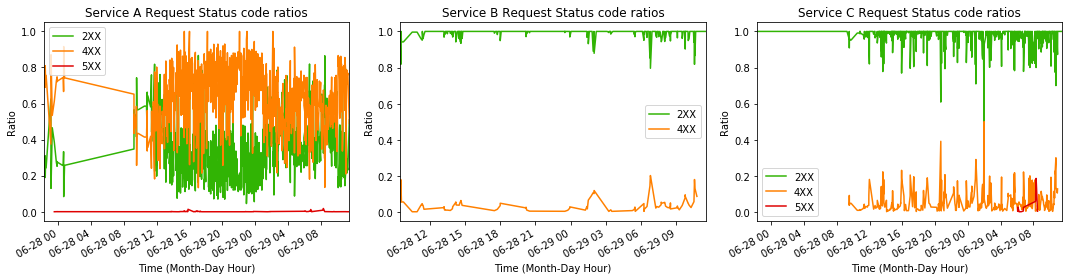

In [11]:
values = ['huawei.status_code.api_com.2XX', 
    'huawei.status_code.api_com.4XX',
    'huawei.status_code.api_com.5XX',
    'huawei.status_code.cinder-api-cascaded.2XX',
    'huawei.status_code.cinder-api-cascaded.4XX',
    'huawei.status_code.neutron-server-cascading.2XX',
    'huawei.status_code.neutron-server-cascading.4XX',
    'huawei.status_code.neutron-server-cascading.5XX']

huawei_service_degree_df_1 = metrics_df.loc[metrics_df['metric_name'] == values[0]]
huawei_service_degree_df_2 = metrics_df.loc[metrics_df['metric_name'] == values[1]]
huawei_service_degree_df_3 = metrics_df.loc[metrics_df['metric_name'] == values[2]]
huawei_service_degree_df_4 = metrics_df.loc[metrics_df['metric_name'] == values[3]]
huawei_service_degree_df_5 = metrics_df.loc[metrics_df['metric_name'] == values[4]]
huawei_service_degree_df_6 = metrics_df.loc[metrics_df['metric_name'] == values[5]]
huawei_service_degree_df_7 = metrics_df.loc[metrics_df['metric_name'] == values[6]]
huawei_service_degree_df_8 = metrics_df.loc[metrics_df['metric_name'] == values[7]]

cGreen = '#31B404'
cOrange = '#FF8000'
cRed = '#DF0101'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax = huawei_service_degree_df_1.plot(ax=axes[0], x ='datetime', y='value', kind = 'line', c=cGreen)
ax = huawei_service_degree_df_2.plot(ax=axes[0], x ='datetime', y='value', kind = 'line', c=cOrange)
ax = huawei_service_degree_df_3.plot(ax=axes[0], x ='datetime', y='value', kind = 'line', c=cRed)
ax.set_title("Service A Request Status code ratios")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Ratio")
ax.legend(["2XX", "4XX", "5XX"])

ax = huawei_service_degree_df_4.plot(ax=axes[1], x ='datetime', y='value', kind = 'line', c=cGreen)
ax = huawei_service_degree_df_5.plot(ax=axes[1], x ='datetime', y='value', kind = 'line', c=cOrange)
ax.set_title("Service B Request Status code ratios")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Ratio")
ax.legend(["2XX", "4XX"])

ax = huawei_service_degree_df_6.plot(ax=axes[2], x ='datetime', y='value', kind = 'line', c=cGreen)
ax = huawei_service_degree_df_7.plot(ax=axes[2], x ='datetime', y='value', kind = 'line', c=cOrange)
ax = huawei_service_degree_df_8.plot(ax=axes[2], x ='datetime', y='value', kind = 'line', c=cRed)
ax.set_title("Service C Request Status code ratios")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Ratio")
ax.legend(["2XX", "4XX", "5XX"])

fig.tight_layout()
plt.show()

fig.savefig('service_status_code_ratio.pdf')

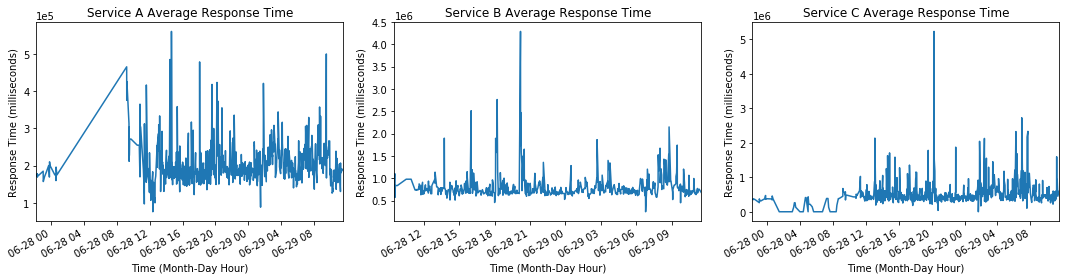

In [12]:
values = ['huawei.response_time_avg.api_com', 
       'huawei.response_time_avg.cinder-api-cascaded',
       'huawei.response_time_avg.neutron-server-cascading']

huawei_service_degree_df_1 = metrics_df.loc[metrics_df['metric_name'] == values[0]]
huawei_service_degree_df_2 = metrics_df.loc[metrics_df['metric_name'] == values[1]]
huawei_service_degree_df_3 = metrics_df.loc[metrics_df['metric_name'] == values[2]]

cGreen = '#31B404'
cOrange = '#FF8000'
cRed = '#DF0101'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax = huawei_service_degree_df_1.plot(ax=axes[0], x ='datetime', y='value', kind = 'line')
ax.set_title("Service A Average Response Time")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Response Time (milliseconds)")
ax.get_legend().remove()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax = huawei_service_degree_df_2.plot(ax=axes[1], x ='datetime', y='value', kind = 'line')
ax.set_title("Service B Average Response Time")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Response Time (milliseconds)")
ax.get_legend().remove()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax = huawei_service_degree_df_3.plot(ax=axes[2], x ='datetime', y='value', kind = 'line')
ax.set_title("Service C Average Response Time")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Response Time (milliseconds)")
ax.get_legend().remove()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

fig.tight_layout()
plt.show()

fig.savefig('service_avg_response_time.pdf')

In [39]:
# Read CSV to dataframe and filter 'anomalous candidates'
anomalous_df = pd.read_csv("anomalous_sample_data.csv")

anomalous_timestamps_locations = anomalous_df.loc[anomalous_df['anomaly'] == -1]

anomalous_timestamps_values = list(anomalous_timestamps_locations['datetime'])

print(anomalous_timestamps_values)

['2018-06-28 01:52:15', '2018-06-28 01:52:30', '2018-06-28 01:55:00', '2018-06-28 05:20:45', '2018-06-28 09:00:30', '2018-06-28 09:00:45', '2018-06-28 14:30:00', '2018-06-28 16:30:00', '2018-06-28 17:04:15', '2018-06-28 17:04:30', '2018-06-28 17:30:00', '2018-06-28 19:30:00', '2018-06-28 19:35:15', '2018-06-28 20:30:00']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 5211 to 5451
Data columns (total 4 columns):
metric_name    241 non-null object
timestamp      241 non-null object
datetime       241 non-null datetime64[ns]
value          241 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.4+ KB
None


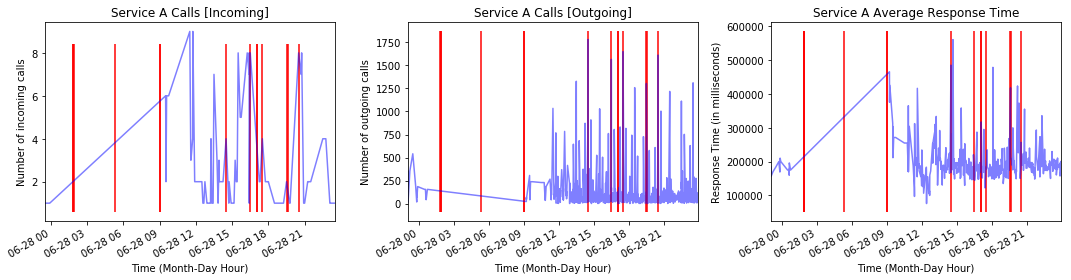

In [77]:
import numpy as np

values = ['huawei.call_count_in.api_com', 
          #'huawei.call_count_in.neutron-server-cascading',
          #'huawei.call_count.api_com', 
          'huawei.call_count_out.api_com',
          #'huawei.call_count_in.cinder-api-cascaded',
          #'huawei.call_count.cinder-api-cascaded',
          #'huawei.call_count_out.cinder-api-cascaded',
          #'huawei.call_count.neutron-server-cascading',
          #'huawei.call_count_out.neutron-server-cascading',
          'huawei.response_time_avg.api_com'
          #'huawei.response_time_avg.cinder-api-cascaded'
          #'huawei.response_time_avg.neutron-server-cascading'
]

huawei_service_degree_df_1 = metrics_df.loc[metrics_df['metric_name'] == values[0]]
huawei_service_degree_df_2 = metrics_df.loc[metrics_df['metric_name'] == values[1]]
huawei_service_degree_df_3 = metrics_df.loc[metrics_df['metric_name'] == values[2]]

x_min = np.datetime64('2018-06-27 23:00:00')
x_max = np.datetime64('2018-06-28 23:59:59')

print(huawei_service_degree_df_1.info())

huawei_service_degree_df_1 = huawei_service_degree_df_1[huawei_service_degree_df_1.datetime > x_min]
huawei_service_degree_df_1 = huawei_service_degree_df_1[huawei_service_degree_df_1.datetime < x_max]

huawei_service_degree_df_2 = huawei_service_degree_df_2[huawei_service_degree_df_2.datetime > x_min]
huawei_service_degree_df_2 = huawei_service_degree_df_2[huawei_service_degree_df_2.datetime < x_max]

huawei_service_degree_df_3 = huawei_service_degree_df_3[huawei_service_degree_df_3.datetime > x_min]
huawei_service_degree_df_3 = huawei_service_degree_df_3[huawei_service_degree_df_3.datetime < x_max]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax = huawei_service_degree_df_1.plot(ax=axes[0], x ='datetime', y='value', kind = 'line', c='b', alpha=0.5)
ax.set_title("Service A Calls [Incoming]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Number of incoming calls")
ax.get_legend().remove()
ymin, ymax = ax.get_ylim()
ax.vlines(x=anomalous_timestamps_values, ymin=ymin, ymax=ymax-1, color='r')

ax = huawei_service_degree_df_2.plot(ax=axes[1], x ='datetime', y='value', kind = 'line', c='b', alpha=0.5)
ax.set_title("Service A Calls [Outgoing]")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Number of outgoing calls")
ax.get_legend().remove()
ymin, ymax = ax.get_ylim()
ax.vlines(x=anomalous_timestamps_values, ymin=ymin, ymax=ymax-1, color='r')

ax = huawei_service_degree_df_3.plot(ax=axes[2], x ='datetime', y='value', kind = 'line', c='b', alpha=0.5)
ax.set_title("Service A Average Response Time")
ax.set_xlabel("Time (Month-Day Hour)")
ax.set_ylabel("Response Time (in milliseconds)")
ax.get_legend().remove()
ymin, ymax = ax.get_ylim()
ax.vlines(x=anomalous_timestamps_values, ymin=ymin, ymax=ymax-1, color='r')

fig.tight_layout()
plt.show()

fig.savefig('service_isolation_forest_detections.pdf')